# Analyzing Time Series Patterns in the S&P 500 Index

In this activity you we gain some additional practice working with the hvPlot grouped plots.

### Import Libraries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path

## 1. Read the S&P 500 volume into a DataFrame. (Make sure to declare the datetime index).

In [2]:
# Import data
sp500_path = Path('../Resources/sp500_stock_volume.csv')

# Read the S&P 500 volume into a DataFrame. (Make sure to declare the datetime index).
sp500_data = pd.read_csv(
    sp500_path, 
    index_col='Date',     
    parse_dates=True
)

# Display sample data
sp500_data.head()

,close,volume
Date,,
2020-03-12 08:00:00,258.60,229683
2020-03-12 09:00:00,257.76,457488
2020-03-12 10:00:00,252.81,291881
2020-03-12 11:00:00,259.99,353484
2020-03-12 12:00:00,257.12,520699


## 2. Slice the dataframe so that it just includes the volume data.

In [3]:
# Slice the dataframe so that it just includes the volume data.
sp500_volume = sp500_data['volume']

## 3. Using hvPlot, plot the volume data according to the day of the week.

In [4]:
# Declare the group level to be the day of the week (e.g., Mon, Tues,...)
group_level = sp500_volume.index.dayofweek

# Plot average daily volume according to day of the week
sp500_volume.groupby(group_level).mean().hvplot()

:Curve   [Date]   (volume)

**Question:** On what day does trading in the S&P500 tend to be the most active?

>**Sample Answer:** This chart depicts that the day of the week corresponding with `3` is most active - this would mean that Thursday is the most active day.

## 4. Use hvPlot to visualize hourly trends for each day of the week in the form of a heatmap. 

In [5]:
# Use hvPlot to visualize the hourly trends across days of week in a heatmap
sp500_volume.hvplot.heatmap(
    x='index.hour',
    y='index.dayofweek',
    C='volume',
    cmap='reds'
).aggregate(function=np.mean)

:HeatMap   [index.hour,index.dayofweek]   (volume)

**Question:** Based on the above, does any day-of-week effect that you observe concentrate in just a few hours of that day?

> **Sample Answer**: Based on the graph above, it looks like trading intensity is highest at the end of each day (14:00), regardless of what day of the week it is. The exception is probably Monday (index.dayofweek==0): the deep dark red at the bottom right here indicates that trading volume is unusually large on Mondays the hour before market close.

## 5. Create a plot with hvPlot that shows the data grouped by the calendar week in the year (week of year).

**Question:** Does share trading intensity tend to increase at any particular time of the calendar year?

> **Sample Answer**: Based on the graph above, it looks like trading intensity (the amount of shares traded) for the S&P500 is at its highest around weeks 11-14 of the year, so roughly March/April of each year.

<Axes: title={'center': 'SP500 Mean Volume per Week'}, xlabel='Date'>

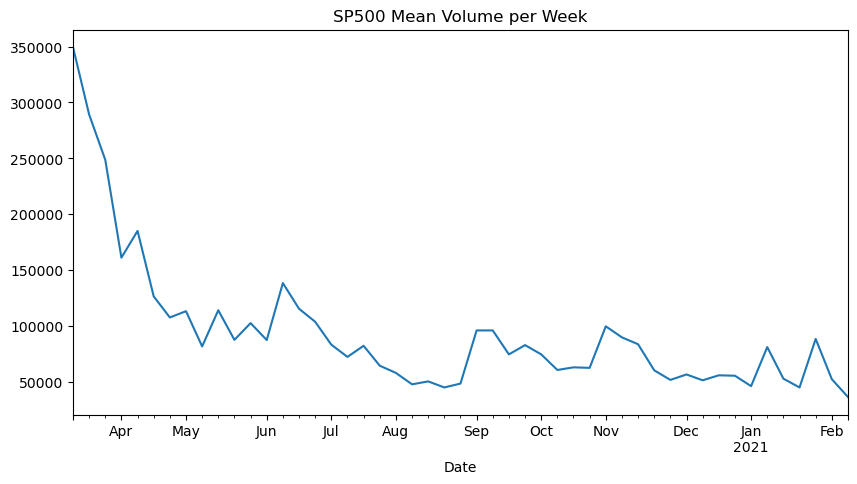

In [9]:
# Group the data by the calendar week in the year (week of year). 
sp500_volume.groupby(by=pd.Grouper(freq='W')).mean().plot(
    title="SP500 Mean Volume per Week",
    figsize=[10, 5]
)


<Axes: title={'center': 'SP500 Mean Volume per Week'}, xlabel='Date'>

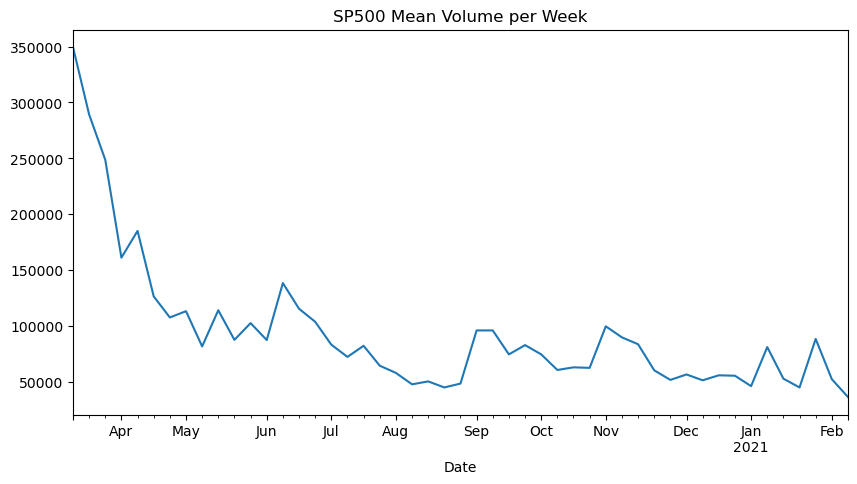

In [10]:
# Resample the data to a weekly frequency and calculate the mean
weekly_mean_volume = sp500_volume.resample('W').mean()

# Plot the weekly mean volume
weekly_mean_volume.plot(
    title="SP500 Mean Volume per Week",
    figsize=[10, 5]
)
